In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Load the CSV file
df = pd.read_csv(r'D:\Coding\Major-Project\new_\data\PEMfuel cell.csv')

In [3]:
# Step 2: Inspect the data
print("Data Info:")
print(df.info())
print("\nData Description:")
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   I           1491 non-null   float64
 1   V           1491 non-null   float64
 2   P           1491 non-null   float64
 3   Q           1491 non-null   float64
 4   T           1491 non-null   float64
 5   Hydrogen    1491 non-null   float64
 6   Oxygen      1491 non-null   float64
 7   RH anode    1491 non-null   float64
 8   Rh Cathode  1491 non-null   float64
dtypes: float64(9)
memory usage: 105.0 KB
None

Data Description:
                  I            V             P            Q            T  \
count  1.491000e+03  1491.000000  1.491000e+03  1491.000000  1491.000000   
mean   7.771881e+01   409.445420  2.473379e+01    14.318921    49.767306   
std    9.512274e+01    76.397361  2.407938e+01    25.839677    23.605715   
min   -1.010000e-28   204.316863 -5.050000e-29    -0.000006   

In [4]:
# Step 3: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
I             0
V             0
P             0
Q             0
T             0
Hydrogen      0
Oxygen        0
RH anode      0
Rh Cathode    0
dtype: int64


In [7]:
# Handle missing values (if any) using mean imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [9]:
# Step 4: Feature selection
# Select features (excluding 'V' as it is the target)
features = ['I', 'P', 'Q', 'T', 'Hydrogen', 'Oxygen', 'RH anode', 'Rh Cathode']
X = df_imputed[features]
y = df_imputed['V']

In [10]:
# Step 5: Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

In [11]:
# Check outliers for each feature
for col in features + ['V']:
    outliers = detect_outliers(df_imputed, col)
    print(f"\nOutliers in {col}: {len(outliers)}")


Outliers in I: 107

Outliers in P: 0

Outliers in Q: 279

Outliers in T: 0

Outliers in Hydrogen: 79

Outliers in Oxygen: 154

Outliers in RH anode: 100

Outliers in Rh Cathode: 280

Outliers in V: 191


In [12]:
# Optionally, cap outliers (e.g., replace with bounds)
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

In [13]:
# Apply outlier capping to numerical columns
for col in features + ['V']:
    df_imputed = cap_outliers(df_imputed, col)

In [ ]:
# Step 6: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed[features])
X_scaled = pd.DataFrame(X_scaled, columns=features)

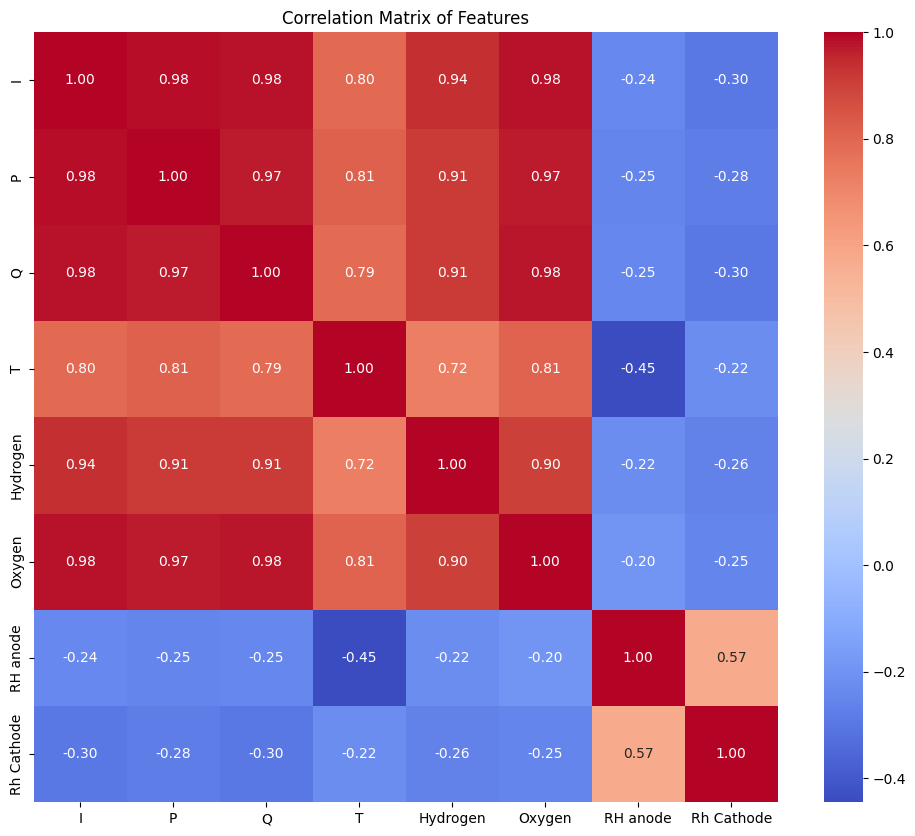

In [16]:
# Step 7: Check for multicollinearity using correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [17]:
# Step 8: Combine scaled features and target
preprocessed_df = pd.concat([X_scaled, df_imputed['V'].reset_index(drop=True)], axis=1)

In [18]:
preprocessed_df.to_csv('preprocessed_data.csv', index=False)
print("\nPreprocessed data saved to 'preprocessed_data.csv'")


Preprocessed data saved to 'preprocessed_data.csv'
